# Challenge: What test to use


Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
import io
import requests
url='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [7]:
#Getting the count of all the categorical items

categorical = [var for var in df.columns if df[var].dtype=='O']
for cats in categorical:
    print('\n\n' +cats+'\n****************')
    print(df[cats].value_counts()) 



cntry
****************
ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64


In [8]:
#Getting the count of all the categorical items

numerical = [var for var in df.columns if df[var].dtype!='O']
for nums in numerical:
    print('\n\n' +nums+'\n****************')
    print(df[nums].value_counts()) 



idno
****************
1208.0     8
2077.0     8
1247.0     8
1035.0     8
1353.0     8
1431.0     8
1361.0     8
1418.0     8
2102.0     8
1096.0     7
1453.0     7
1448.0     7
1463.0     7
1236.0     7
1017.0     7
1468.0     7
1430.0     6
1092.0     6
1336.0     6
1220.0     6
1230.0     6
1103.0     6
1306.0     6
1014.0     6
1287.0     6
1577.0     6
1009.0     6
2060.0     6
1072.0     6
1906.0     6
          ..
715.0      1
750.0      1
14460.0    1
885.0      1
1713.0     1
2185.0     1
12810.0    1
2809.0     1
482.0      1
14652.0    1
3561.0     1
2347.0     1
190.0      1
3313.0     1
17460.0    1
1472.0     1
568.0      1
15912.0    1
6684.0     1
2711.0     1
2354.0     1
15072.0    1
1954.0     1
20316.0    1
13920.0    1
16488.0    1
9846.0     1
7878.0     1
356.0      1
2361.0     1
Name: idno, Length: 3076, dtype: int64


year
****************
7    4076
6    4071
Name: year, dtype: int64


tvtot
****************
2.0    1391
4.0    1344
3.0    1344
7.0    1149
5.

In [9]:
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

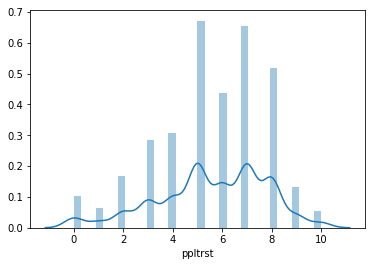

In [11]:
sns.distplot(df['ppltrst'])

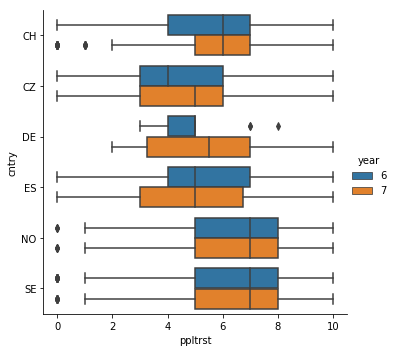

In [12]:
sns.catplot(x="ppltrst", y="cntry",hue='year', kind="box", data=df);

((array([-3.7596476 , -3.53162349, -3.4063011 , ...,  3.4063011 ,
          3.53162349,  3.7596476 ]),
  array([ 0.,  0.,  0., ..., 10., 10., 10.])),
 (2.1667799769236327, 5.57493555910151, 0.9775404447676587))

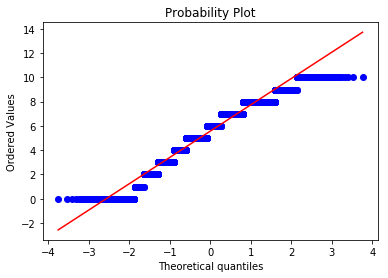

In [13]:
import pylab 
import scipy.stats as stats
stats.probplot(df.ppltrst, dist="norm", plot=pylab)

# split into 2012 and 2014

In [14]:
year2012 = df[df['year']==6]
year2014 = df[df['year']==7]

ES2012 = year2012[year2012['cntry']=='ES']
SE2012 = year2012[year2012['cntry']=='SE']
CH2012 = year2012[year2012['cntry']=='CH']
NO2012 = year2012[year2012['cntry']=='NO']
CZ2012 = year2012[year2012['cntry']=='CZ']
DE2012 = year2012[year2012['cntry']=='DE']

ES2014 = year2014[year2014['cntry']=='ES']
SE2014 = year2014[year2014['cntry']=='SE']
CH2014 = year2014[year2014['cntry']=='CH']
NO2014 = year2014[year2014['cntry']=='NO']
CZ2014 = year2014[year2014['cntry']=='CZ']
DE2014 = year2014[year2014['cntry']=='DE']

In [15]:
year2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

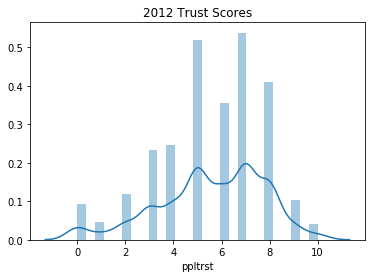

In [16]:
fig = plt.figure()
plt.title('2012 Trust Scores')
sns.distplot(year2012['ppltrst'])

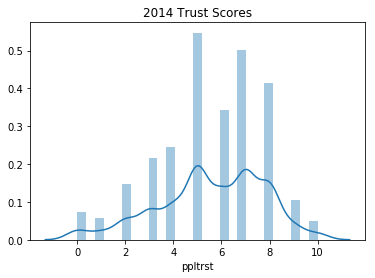

In [17]:
plt.title('2014 Trust Scores')
sns.distplot(year2014['ppltrst'])

In [18]:
stats.kruskal(year2012['ppltrst'], year2014['ppltrst'])

KruskalResult(statistic=0.11927994139654356, pvalue=0.7298167669759283)

In [19]:
stats.kruskal(ES2012['ppltrst'], ES2014['ppltrst'])

KruskalResult(statistic=6.254399514712144, pvalue=0.012388523566141176)

In [20]:
stats.kruskal(SE2012['ppltrst'], SE2014['ppltrst'])

KruskalResult(statistic=4.486790845114948, pvalue=0.03415774143761488)

In [21]:
stats.kruskal(CH2012['ppltrst'], CH2014['ppltrst'])

KruskalResult(statistic=0.3211329972268854, pvalue=0.5709275494134165)

In [22]:
stats.kruskal(NO2012['ppltrst'], NO2014['ppltrst'])

KruskalResult(statistic=0.20681671394808315, pvalue=0.649273954856751)

In [23]:
stats.kruskal(CZ2012['ppltrst'], CZ2014['ppltrst'])

KruskalResult(statistic=3.397334444818437e-05, pvalue=0.9953494239190417)

In [24]:
stats.kruskal(DE2012['ppltrst'], DE2014['ppltrst'])

KruskalResult(statistic=0.11943127962085082, pvalue=0.7296521329635768)

# 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

No they did not. both graphs look the same

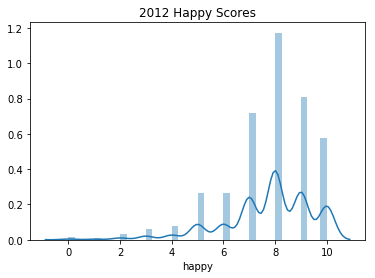

In [25]:
plt.title('2012 Happy Scores')
sns.distplot(year2012['happy'])

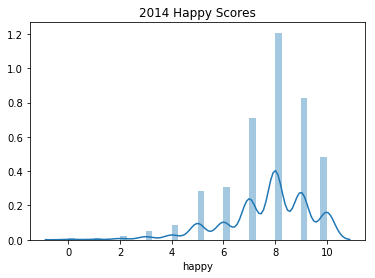

In [26]:
plt.title('2014 Happy Scores')
sns.distplot(year2014['happy'])

ES2012
SE2012
CH2012
NO2012
CZ2012
DE2012

ES2014
SE2014
CH2014
NO2014
CZ2014
DE2014

In [27]:
stats.kruskal(year2012['happy'], year2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [28]:
stats.kruskal(ES2012['happy'], ES2014['happy'])

KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)

In [29]:
stats.kruskal(SE2012['happy'], SE2014['happy'])

KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)

In [30]:
stats.kruskal(CH2012['happy'], CH2014['happy'])

KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)

In [31]:
stats.kruskal(NO2012['happy'], NO2014['happy'])

KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)

In [32]:
stats.kruskal(CZ2012['happy'], CZ2014['happy'])

KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)

In [33]:
stats.kruskal(DE2012['happy'], DE2014['happy'])

KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)

# 3. Who reported watching more TV in 2012, men or women?

In [34]:
men2012 = year2012[year2012['gndr'] == 1]
women2012 = year2012[year2012['gndr'] == 2]

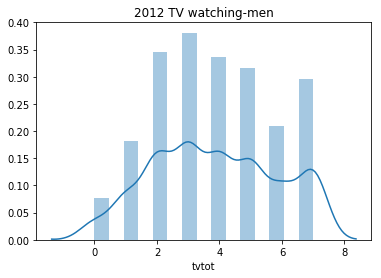

In [35]:
plt.title('2012 TV watching-men')
sns.distplot(men2012['tvtot'])

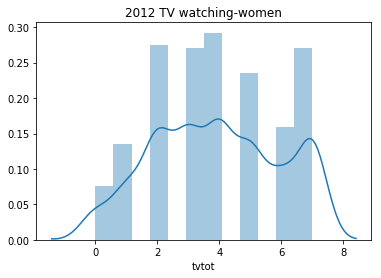

In [36]:
plt.title('2012 TV watching-women')
sns.distplot(women2012['tvtot'])

In [37]:
stats.kruskal(men2012['tvtot'], women2012['tvtot'])

KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)

# 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [38]:
partner = year2012[year2012['partner'] == 1]
noPartner = year2012[year2012['partner'] == 2]

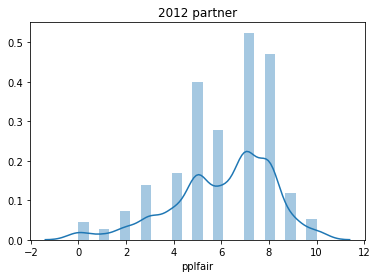

In [39]:
plt.title('2012 partner')
sns.distplot(partner['pplfair'])

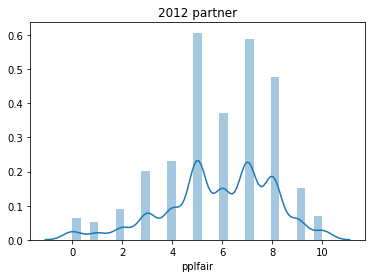

In [40]:
plt.title('2012 partner')
sns.distplot(noPartner['pplfair'])

In [41]:
stats.kruskal(partner['pplfair'],noPartner['pplfair'])

KruskalResult(statistic=11.887452362061, pvalue=0.0005651336752494688)

# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

There is a difference.  SE stands out as being morer social/

In [42]:
year2014['cntry'].value_counts()

ES    1134
SE     867
CH     743
NO     712
CZ     606
DE      14
Name: cntry, dtype: int64

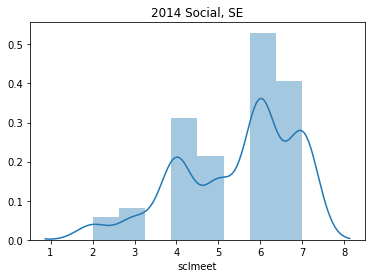

In [43]:
plt.title('2014 Social, SE')
sns.distplot(SE2014['sclmeet'])

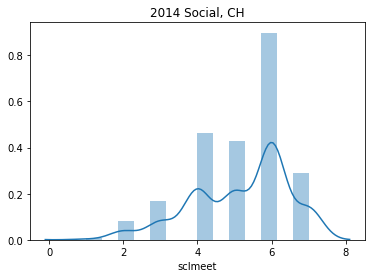

In [44]:
plt.title('2014 Social, CH')
sns.distplot(CH2014['sclmeet'])

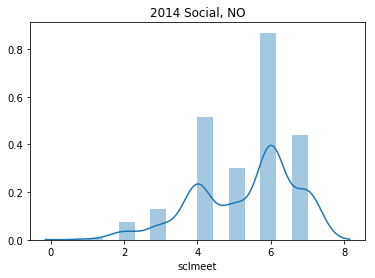

In [45]:
plt.title('2014 Social, NO')
sns.distplot(NO2014['sclmeet'])

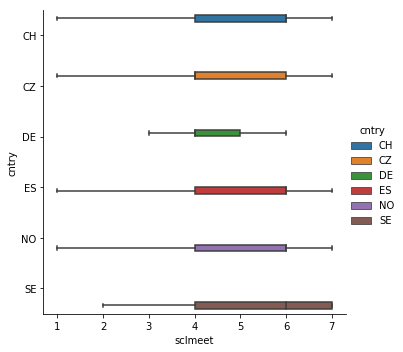

In [46]:
sns.catplot(x="sclmeet", y="cntry",hue='cntry', kind="box", data=year2014);

# 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

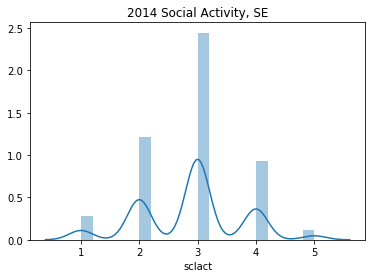

In [47]:
plt.title('2014 Social Activity, SE')
sns.distplot(SE2014['sclact'])

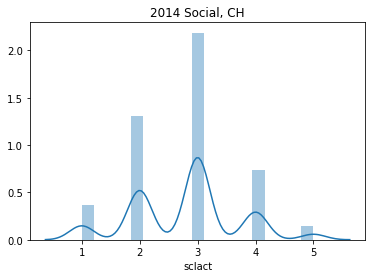

In [48]:
plt.title('2014 Social, CH')
sns.distplot(CH2014['sclact'])

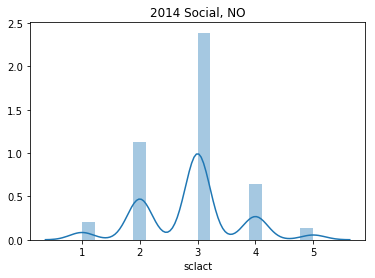

In [49]:
plt.title('2014 Social, NO')
sns.distplot(NO2014['sclact'])

In [50]:
countries = pd.concat([SE2014, CH2014, NO2014])

In [51]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = ols('sclact ~ cntry', data=countries).fit()
table = sm.stats.anova_lm(results, typ=2)
print(table)

               sum_sq      df         F    PR(>F)
cntry        3.875471     2.0  2.598868  0.074574
Residual  1729.063375  2319.0       NaN       NaN
